Found 2647 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 24s 258ms/step - accuracy: 0.6072 - loss: 0.6519 - val_accuracy: 0.7727 - val_loss: 0.5047
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 248ms/step - accuracy: 0.7536 - loss: 0.5192 - val_accuracy: 0.7864 - val_loss: 0.4393
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 43s 266ms/step - accuracy: 0.7471 - loss: 0.4904 - val_accuracy: 0.7667 - val_loss: 0.4268
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 39s 245ms/step - accuracy: 0.7678 - loss: 0.4583 - val_accuracy: 0.7909 - val_loss: 0.4044
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 243ms/step - accuracy: 0.7671 - loss: 0.4604 - val_accuracy: 0.7697 - val_loss: 0.5396
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 23s 266ms/step - accuracy: 0.7771 - loss: 0.4534 - val_accuracy: 0.7939 - val_loss: 0.3881
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 250ms/step - accuracy: 0.7846 - loss: 0.4391 - val_accuracy: 0.7182 - val_loss: 0.5252
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 240ms/step - accuracy: 0.7907 - loss: 0.4282 - val_accuracy: 0.795

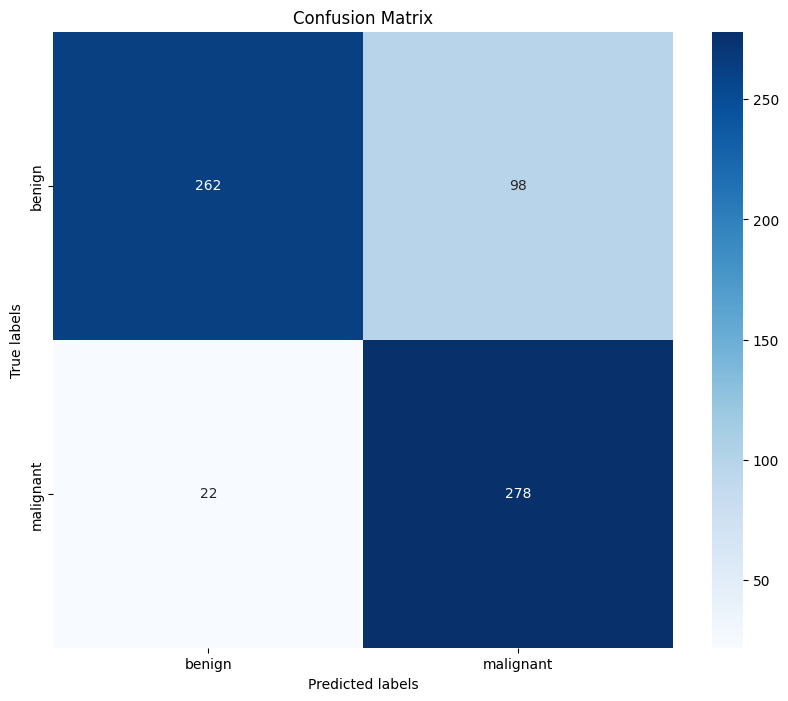

              precision    recall  f1-score   support

      benign       0.92      0.73      0.81       360
   malignant       0.74      0.93      0.82       300

    accuracy                           0.82       660
   macro avg       0.83      0.83      0.82       660
weighted avg       0.84      0.82      0.82       660

Accuracy: 0.82
Precision: 0.84
Recall: 0.82
F1 score: 0.82
Specificity: 0.73


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set the path to the training and testing folders
train_dir = '/content/drive/MyDrive/Small_skin/train'
test_dir = '/content/drive/MyDrive/Small_skin/test'

# Set the image size and initialize number of classes
img_size = (28, 28)

# Create data generators for training and testing
train_datagen = keras.preprocessing.image.ImageDataGenerator(
  rescale=1./255,
  rotation_range=10,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  fill_mode='nearest'
)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=img_size,
  batch_size=32,
  class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
  test_dir,
  target_size=img_size,
  batch_size=32,
  class_mode='categorical',
  shuffle=False
)

# Get the number of classes from the generator
num_classes = train_generator.num_classes

# Create the CNN model
model = keras.Sequential([
  keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Conv2D(64, (3, 3), activation='relu'),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Conv2D(128, (3, 3), activation='relu'),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
  train_generator,
  epochs=50,
  validation_data=test_generator
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')

# Predict on the test data
y_pred = model.predict(test_generator)
y_pred_class = np.argmax(y_pred, axis=1)

# True labels
y_true = test_generator.classes

# Create a confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_class)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(y_true, y_pred_class, target_names=test_generator.class_indices.keys())
print(report)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_class)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_true, y_pred_class, average='weighted')
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_true, y_pred_class, average='weighted')
print(f'Recall: {recall:.2f}')

# Calculate F1 score
f1 = f1_score(y_true, y_pred_class, average='weighted')
print(f'F1 score: {f1:.2f}')

# Calculate specificity
tn, fp, fn, tp = conf_mat.ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.2f}')